## Introduction

Project Github link: 

The dataset I will be working on is "Wine Quality Data Set" from UCI Machine Learning Repositories.<br>
https://archive.ics.uci.edu/ml/datasets/Wine+Quality <br>
It contains a red wine dataset and a white wine dataset, and I choose to focus on the white wine dataset only.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/winequality-white.csv",delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**What is the target variable?**

The target variable is "quality", which indicates the quality of the predicted wine.

**Is the problem regression or classification?**

This is a classification problem because "quality" is an ordinal variables, which makes it a ordinal regression problem.

**Why is this interesting/important?**

I am interested in this dataset because I had many experiences with wine and always had trouble distinguishing good wines from bad ones. There are a lot of people drinking wine everyday so it is very useful to come up a quantitative measure on wine quality. If the prediction measures of this model make sense for other wine types, then it could benefit a large population on helping them determine the quality of wines they are having.

**Number of data points and number of features.**

This data set contains 4898 instances and 11 columns of explanatory variables and one column of target variables. 

**Add a 1-2 paragraph description or overview of the features.**

Input variables are collected based on physicochemical tests:
- fixed acidity: the set of low volatility organic acids such as malic, lactic, tartaric or citric acids
- volatile acidity: a measure of the wine's volatile (or gaseous) acids
- citric acid: organic compound with the chemical formula HOC(CH₂CO₂H)₂
- residual sugar: the amount of sugar remained in the solution
- chlorides: the amount of chlorides
- free sulfur dioxide: unbounded SO2 present in the solution
- total sulfur dioxide: bounded and unbounded SO2 present in the solution
- density: mass divided by volume
- pH: a scale used to specify the acidity or basicity of an aqueous solution
- sulphates: the amount of sulphates
- alcohol: the amount of alcohol

**Where did the data come from? How was it collected?**


The author of this dataset collected samples of the wines and contructed the dataset from lab results and expert ratings. The data were collected from May/2004 to February/2007 using origin samples that were tested at the official certification entity CVRVV. CVRVV is a professional organization whose goal is to improve the quality of vinho verde wine. Therefore, the inputs are object tests on the samples conducted in lab settings. The output variable is created based on the median of at least 3 evaluations from wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). 


**If the dataset is from Kaggle/UCI/already described, do some literature search. Write a short description about 2-3 public projects or publications where the data has been used, what did the authors find, what ML question did they solve and how successful they were (evaluation metric and test scores). The results of the previous work gives you expectation for your ML results.**

The author of this dataset actually tried several data mining methods to model the datasets. They adopted a regressional approach. They used regressional metrics MAD, and also computed categorical accuracies and constructed confusion matrix for a fixed error tolerance (T). When T =0.5, then output results are rounded to the closest integer and correlates with a class prediction. In their research, they find that support vector machine model achieved the best results as compared to neural networks and multiple regressions. When admitting only the correct classified classes (T = 0.5), the overall accuracy is 64.6% on white wine, which is much higher than a randome classifier. When the tolerance is set to T = 1.0, which means to accept predictions as correct if it is within the one of the two nearest classes, their best model can obtain a global accuracy of 86.8% on white wine.

Another very recent study in 2021, called "Analysis of white wine using machine learning algorithms" performed similar research on the dataset using many machine learning models including Naive Bayes, SVM, Random Forests, J48, and multilayer perceptron. The researchers used regressional metrics including mean abosolute error(MAE), root mean square error(RMSE), Relatiuve Abosolute Error(RAE), and root relative squared error(RRSE), as well as classfication metrics including accuracy, f1-score, kappa statistics, and ROC area. Their results are promising, which indicates that J48, RF, MLP could all get accuracy around 0.999 and for regressional metrics, MLP achieved lowest MAE AND RAE while J48 has the lowest RMSE and RRSE.

## EDA

**Input features**

All of my input features are continous variables, and I have studied their distribution, skewness and shape. <br><br>
Most of my input feature are postive numbers, most of them are normally distributed with a non-zero mean with some outliers three std away from the mean. These includes: fixed acidity, volatile acidity, citric acid, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, and sulphates. I will histogram to plot chlorides to show an example of these type of feature. <br><br>
Some features have skewness and are distributed normally. These include residual sugar and alcohol. I also use histogram to plot them.

**Plotting normally distributed features**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df['chlorides'].describe()

count    4898.000000
mean        0.045772
std         0.021848
min         0.009000
25%         0.036000
50%         0.043000
75%         0.050000
max         0.346000
Name: chlorides, dtype: float64

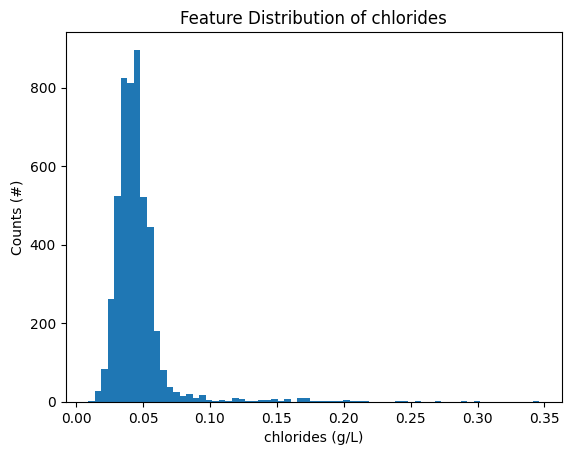

In [14]:
variable = 'chlorides'
plt.hist(df[variable],bins=int(np.sqrt(len(df[variable]))))
plt.ylabel("Counts (#)")
plt.xlabel("chlorides (g/L)")
plt.title("Feature Distribution of chlorides")
plt.savefig('../figures/chlorides.png',dpi=300)
plt.show()

**Plotting skewed features**

In [15]:
df['residual sugar'].describe()

count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

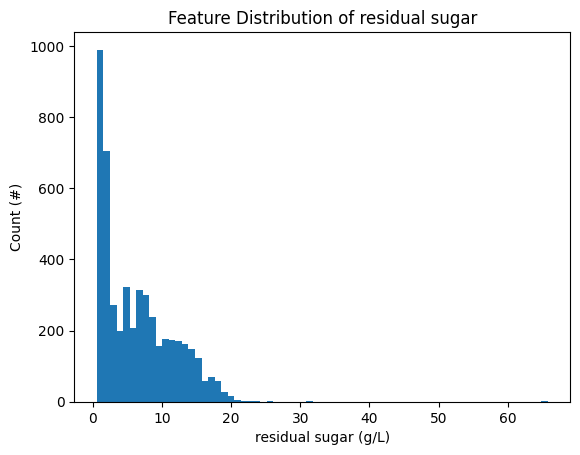

In [16]:
variable = 'residual sugar'
plt.hist(df[variable],bins=int(np.sqrt(len(df[variable]))))
plt.ylabel("Count (#)")
plt.xlabel("residual sugar (g/L)")
plt.title("Feature Distribution of residual sugar")
plt.savefig('../figures/residual sugar.png',dpi=300)
plt.show()

**Target variable**

**Analysis**

Our target variable is an ordinal variable so it has both regressional features as well as class distribution. Therefore I studied both. The distribution of our target variable is normally distributioned with a very small standard deviation and no skewness. A quality score of 3 and 9 could considered outliers in this distribution because they are three std away from the mean, and also their presences are rare. The class distribution also shows that we have a inbalanced class, quality score of 6 is the majority class and 3,4,8,9 have very little presences compared to 5, 6, 7.

In [17]:
#distribution
df['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

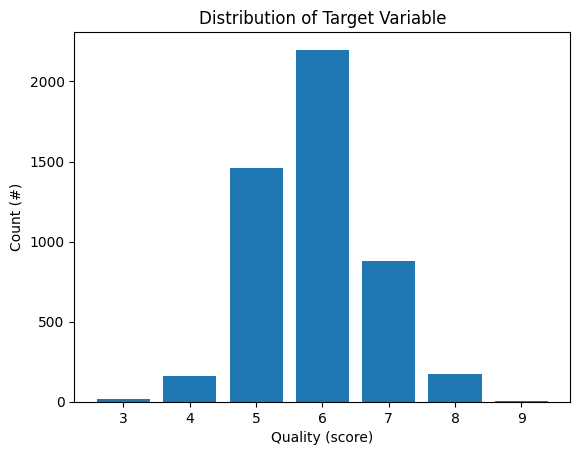

In [18]:
plt.bar(np.sort(df['quality'].unique()),height=df['quality'].value_counts().sort_index().values)
plt.ylabel("Count (#)")
plt.xlabel("Quality (score)")
plt.title("Distribution of Target Variable")
plt.savefig('../figures/Target Variable.png',dpi=300)
plt.show()

In [19]:
#class balance
yy = (df['quality'].value_counts().sort_index().values/len(df)).round(4)
xx = np.sort(df['quality'].unique())
dict(zip(xx,yy))

{3: 0.0041, 4: 0.0333, 5: 0.2975, 6: 0.4488, 7: 0.1797, 8: 0.0357, 9: 0.001}

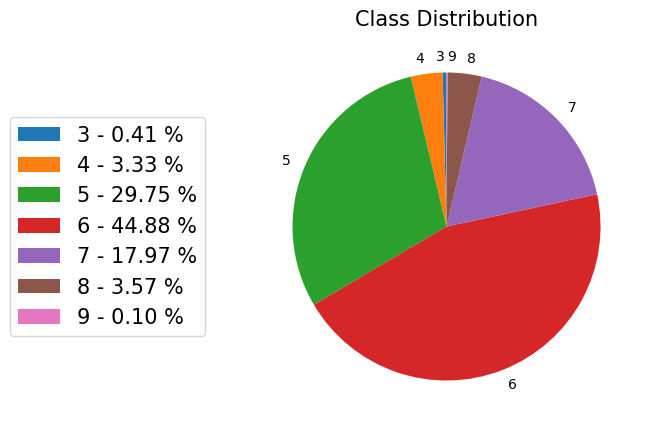

In [20]:
plt.figure(figsize=(10,5))
percent = 100.*yy/yy.sum()
patches, texts = plt.pie(yy,
        labels=xx,
        startangle=90,
        labeldistance=1.1,)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(xx, percent)]
plt.legend(patches, 
           labels,
           loc='center right', 
           bbox_to_anchor=(-0.1, 0.5),
           fontsize=15)
plt.title("Class Distribution", fontsize=15)
plt.savefig('../figures/class distribution.png',dpi=300)
plt.show()

**Studying input features correlation with target variable**

In [6]:
#getting the most correlated input feature with target variable
import sklearn.feature_selection

In [4]:
X = df[['fixed acidity', 
        'volatile acidity', 
        'citric acid', 
        'residual sugar',
        'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density',
        'pH', 
        'sulphates', 
        'alcohol']]
y=df['quality']

In [23]:
a = sklearn.feature_selection.f_regression(X, y.values.reshape(-1,), center=True, force_finite=True)
X.columns[np.argsort(a[0])[-5:]].values.tolist() 
#the last one has the largest correlation with the target variable

['total sulfur dioxide', 'volatile acidity', 'chlorides', 'density', 'alcohol']

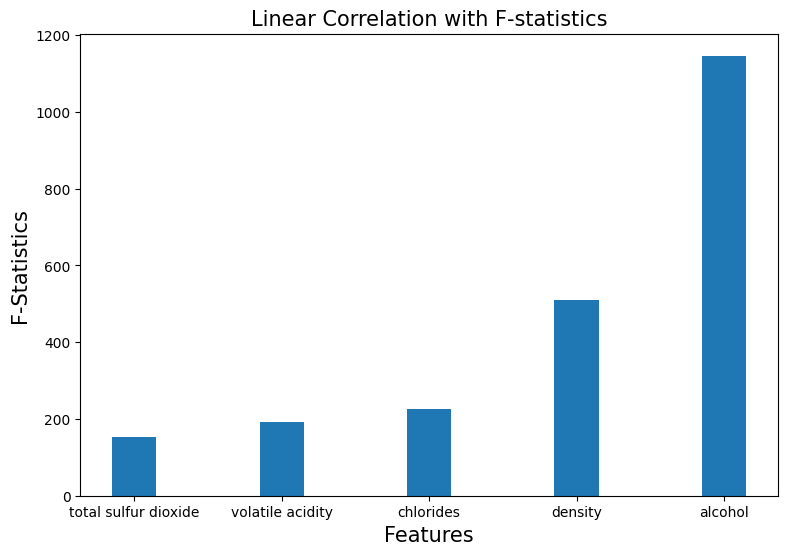

In [24]:
fontsize=15
plt.figure(figsize=(9,6))
columns_to_plot=[]
for i in np.argsort(a[0])[-5:]:
    columns_to_plot+=[X.columns[i]]
plt.bar(columns_to_plot,np.sort(a[0])[-5:],width=0.3)
plt.xlabel("Features", fontsize=fontsize)
plt.ylabel('F-Statistics', fontsize=fontsize)
plt.title('Linear Correlation with F-statistics', fontsize=fontsize)
plt.savefig('../figures/f-stats.png',dpi=300)
plt.show()

**Analysis**

The last one has the largest correlation with the target variable so I plot the distribution of alcohol in each quality class. We can see that the mean of alcohol tend to increase with quality score after quality score is greater than 5, but decrease with quality score when quality score is smaller than 5

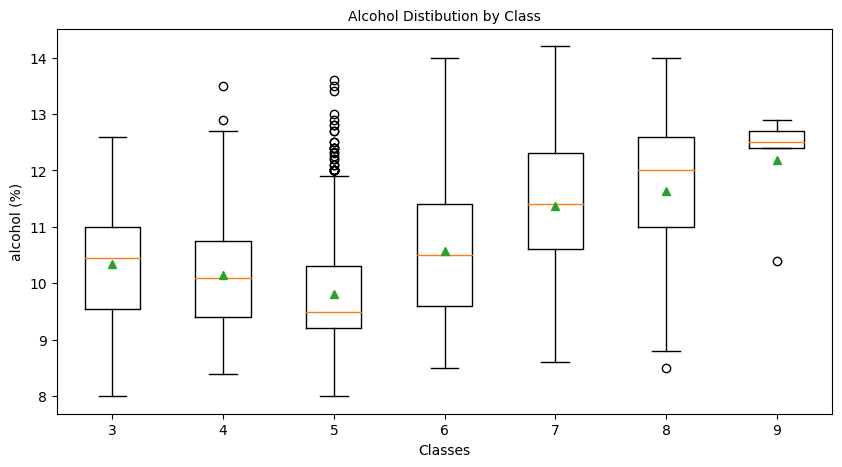

In [25]:
fontsize=10
sorted_classes = np.sort(y.unique())
res = [df[df['quality']==i]['alcohol'].values for i in sorted_classes]
plt.figure(figsize=(10,5))
plt.boxplot(res, labels= sorted_classes, showmeans=True)
plt.xlabel('Classes',fontsize=fontsize) #set labels
plt.ylabel('alcohol (%)',fontsize=fontsize) #set labels
plt.title('Alcohol Distibution by Class',fontsize=fontsize)
plt.savefig('../figures/alcohol.png',dpi=300)
plt.show()

## Preprocessing

- **Discuss how you split the dataset and why.**

I will split my dataset into training, validation, and testing of a 60%-20%-20% ratio with stratification. The reason for this arrangement is that the class in the target variable is not balanced. For example, there are only 5 instances with target variable equals to 9. So I need the 60%-20%-20% ratio to ensure that there is at least 1 instance in all of training, validation, and testing with target variable equals to 9. <br>
Furthermore, I decide to repeat this process and generate another fold of the split to test the robustness of my model selection.

In [5]:
import sklearn.model_selection

In [6]:
X_train,X_,y_train,y_=sklearn.model_selection.train_test_split(X,y,train_size = 0.6,stratify=y)
X_val,X_test,y_val,y_test=sklearn.model_selection.train_test_split(X_,y_,train_size = 0.5,stratify=y_)

In [13]:
#showing the class distribution in the split of quality score 9
np.sum(y_train==9),np.sum(y_val==9),np.sum(y_test==9)

(3, 1, 1)

- **Is your dataset IID?**

Yes, my dataset is independent and identically distributed. The collection of data is done by professional organization. The wine experts and laboratory staff, I assume, will not let their observation be impacted by other observations. Each instance is taken from a different wine sample, so there should not be correlation between each instance.

- **Does it have group structure?**

No, there is no group structure in my dataset. Data are collected in one experiment. The wine experts who are responsible for the target variable and laboratory staff who is responsible for the explanatory vairables are not give extra information like producer, origin, price, brands, etc.

- **Is it time-series data?**

No, it is not time-series data.

- **How do you split the dataset given your ML question to best mimic future use when you deploy the model?**

So the dataset is split into training, validation, and testing. During training process, I aim to minimize the validation loss and validation accuracy. I then test my model using the test set, which is the same as a set of unseen data. This process is the same as when I deploy the model, I will get unseen data into my model and render a prediction.

- **Apply MinMaxEncoder or StandardScaler on the continuous features**

In [8]:
import sklearn.preprocessing

In [14]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [210]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

- **Apply OneHotEncoder or OrdinalEncoder on categorical and ordinal features**

In [213]:
encoder = sklearn.preprocessing.OrdinalEncoder()
y_train = encoder.fit_transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

- **Describe why you chose a particular preprocessor for each feature.**

- fixed acidity: I choose MinMaxScaler because the variable has a large std and mean, MinMaxScaler makes it into from 0 to 1.
- volatile acidity: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- citric acid: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- residual sugar: I choose MinMaxScaler because the variable is not normally distributed and MinMaxScaler is useful for skewed data.
- chlorides: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- free sulfur dioxide: I choose MinMaxScaler because the variable has a large std and mean, MinMaxScaler makes it into from 0 to 1.
- total sulfur dioxide: I choose MinMaxScaler because the variable has a large std and mean, MinMaxScaler makes it into from 0 to 1.
- density: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- pH: I choose MinMaxScaler because the variable has a large std and mean, MinMaxScaler makes it into from 0 to 1.
- sulphates: I choose MinMaxScaler because the variable has a large std and is not zero centered.
- alcohol: I choose MinMaxScaler because the variable is not normally distributed and MinMaxScaler is useful for skewed data.

- quality[**target variable**]: I choose OrdinalEncoder because the variable was ordinal and onehot encoder will loose the order information and makes it a pure classification problem.

- **How many features do you have in the preprocessed data?**

I have 11 features in the preprocessed data.

**Baseline**

In [7]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [8]:
from sklearn.linear_model import LinearRegression

In [78]:
rmse=[]
acc=[]
for i in range(5):
    X_train,X_,y_train,y_=sklearn.model_selection.train_test_split(X,y,train_size = 0.6,stratify=y)
    X_val,X_test,y_val,y_test=sklearn.model_selection.train_test_split(X_,y_,train_size = 0.5,stratify=y_)
    scaler = sklearn.preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    #regr = LinearRegression()
    #regr.fit(X_train,y_train)
    #y_pred = regr.predict(X_test)
    y_pred = np.array([np.mean(y_train) for i in range(len(y_test))])
    rmse.append(mean_squared_error(y_test,y_pred,squared=False))
    i = np.round(y_pred,0)
    acc.append(accuracy_score(y_test,i))

In [83]:
np.mean(rmse),np.std(rmse)

(0.8853705251482736, 0.0007780743729745764)

In [80]:
np.mean(acc)

0.44897959183673464

In [257]:
X_train,X_,y_train,y_=sklearn.model_selection.train_test_split(X,y,train_size = 0.6,stratify=y)
X_val,X_test,y_val,y_test=sklearn.model_selection.train_test_split(X_,y_,train_size = 0.5,stratify=y_)

In [258]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [251]:
scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Model Selection**

In [170]:
unique, counts = np.unique(y_train, return_counts=True)

In [171]:
counts

array([  12,   98,  874, 1318,  528,  105,    3])

In [169]:
def set_weight(x):
    if x==0:
        return 1/12
    elif x==6:
        return 1/3
    elif x==1:
        return 1/98
    elif x==5:
        return 1/105
    elif x==2:
        return 1/874
    elif x==4:
        return 1/528
    else:
        return 1/1318

In [172]:
sample_weight = np.apply_along_axis(set_weight,1,y_train)

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ParameterGrid
def MLpipe_RMSE(X,y,preprocessor,estimator,param_grid):
    
    test_scores = np.zeros(5)
    final_models = []
    test_sets = []
    test_labels = []
    for i in range(5):
        
        pg = ParameterGrid(param_grid)
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=i, stratify=y)
        X_train, X_val, y_train, y_val = train_test_split(X_other,y_other,test_size=0.25,shuffle=True, random_state=1*i, stratify=y_other)
        X_train = preprocessor.fit_transform(X_train)
        X_val = preprocessor.transform(X_val)
        X_test = preprocessor.transform(X_test)
        
        train_score = np.zeros(len(pg))
        val_score = np.zeros(len(pg))
        models = []
        for j in range(len(pg)):
            params=pg[j]
            try:
                regr = estimator(**params,random_state = 1*i)
            except:
                regr = estimator(**params)
            regr.fit(X_train, y_train)
            models.append(regr)
            y_train_pred = regr.predict(X_train)
            train_score[j] = mean_squared_error(y_train,y_train_pred,squared=False)
            y_val_pred = regr.predict(X_val)
            val_score[j] = mean_squared_error(y_val,y_val_pred,squared=False)
        
        final_models.append(models[np.argmin(val_score)])
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = mean_squared_error(y_test,y_test_pred,squared=False)
        test_sets.append(X_test)
        test_labels.append(y_test)
        
    return final_models,test_scores,test_sets,test_labels

In [65]:
from sklearn.linear_model import Ridge

In [119]:
param_grid = {
              'alpha':[0.001,0.01,0.1,1,10]
              } 
preprocessor = sklearn.preprocessing.MinMaxScaler()
estimator = Ridge

final_models,test_score,test_sets, test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [120]:
final_models

[Ridge(alpha=0.001, random_state=0),
 Ridge(alpha=0.001, random_state=1),
 Ridge(alpha=1, random_state=2),
 Ridge(alpha=0.001, random_state=3),
 Ridge(alpha=0.001, random_state=4)]

In [121]:
np.mean(test_score)

0.7454698261355285

In [122]:
np.std(test_score)

0.011458811922170747

In [123]:
-(np.mean(test_score) - 0.8853705251482736)/np.std(test_score)

12.209005607471607

In [124]:
from sklearn import svm
param_grid = {
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[2,3]
              } 

preprocessor = sklearn.preprocessing.MinMaxScaler()

estimator = svm.SVR
final_models,test_score,test_sets, test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [125]:
final_models

[SVR(degree=2), SVR(degree=2), SVR(degree=2), SVR(degree=2), SVR(degree=2)]

In [126]:
np.mean(test_score)

0.7011781669146365

In [127]:
np.std(test_score)

0.006637052249573554

In [128]:
-(np.mean(test_score) - 0.8853705251482736)/np.std(test_score)

27.752133222315962

In [129]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
              'n_estimators':[10,100,1000],
              'max_depth': [1, 3, 10, 30, 100],
              'max_features': [0.25, 0.5,0.75,1.0]
              } 

preprocessor = sklearn.preprocessing.MinMaxScaler()
estimator = RandomForestRegressor
final_models,test_score,test_sets, test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [130]:
final_models

[RandomForestRegressor(max_depth=100, max_features=0.25, n_estimators=1000,
                       random_state=0),
 RandomForestRegressor(max_depth=30, max_features=0.25, n_estimators=1000,
                       random_state=1),
 RandomForestRegressor(max_depth=100, max_features=0.5, n_estimators=1000,
                       random_state=2),
 RandomForestRegressor(max_depth=100, max_features=0.25, n_estimators=1000,
                       random_state=3),
 RandomForestRegressor(max_depth=30, max_features=0.25, random_state=4)]

In [131]:
test_score

array([0.60868292, 0.60756117, 0.6231741 , 0.62133833, 0.62262338])

In [132]:
np.mean(test_score)

0.6166759809488486

In [133]:
np.std(test_score)

0.007018597120680835

In [134]:
-(np.mean(test_score) - 0.8853705251482736)/np.std(test_score)

38.28322663053219

In [100]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
              'n_neighbors': [1, 5, 10, 20],
              'weights': ['uniform', 'distance']
              } 

preprocessor = sklearn.preprocessing.MinMaxScaler()

estimator = KNeighborsRegressor
final_models,test_score,test_sets, test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [101]:
final_models

[KNeighborsRegressor(n_neighbors=20, weights='distance'),
 KNeighborsRegressor(n_neighbors=20, weights='distance'),
 KNeighborsRegressor(n_neighbors=20, weights='distance'),
 KNeighborsRegressor(n_neighbors=10, weights='distance'),
 KNeighborsRegressor(n_neighbors=20, weights='distance')]

In [102]:
test_score

array([0.72312418, 0.65036291, 0.66521146, 0.66410246, 0.6389114 ])

In [103]:
np.mean(test_score)

0.668342482741404

In [104]:
np.std(test_score)

0.029045721196097284

In [105]:
-(np.mean(test_score) - 0.8853705251482736)/np.std(test_score)

7.471945383681179

In [106]:
import xgboost

param_grid = {
             'max_depth': [1, 3, 10, 100],
              'n_estimators':[10,100,500]
              } 

preprocessor = sklearn.preprocessing.MinMaxScaler()

estimator = xgboost.XGBRegressor
final_models,test_score,test_sets, test_labels = MLpipe_RMSE(X,y,preprocessor,estimator,param_grid)

In [107]:
final_models

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
        

In [108]:
np.mean(test_score)

0.6903248489078776

In [109]:
np.std(test_score)

0.03271883082366971

In [110]:
-(np.mean(test_score) - 0.8853705251482736)/np.std(test_score)

5.961266687417649

In [195]:
mean_squared_error(y_val,y_pred)

2.877551020408163

In [196]:
i = np.round(y_pred,0)
accuracy_score(y_val,i)

0.2693877551020408

In [29]:
model = final_models[1]

In [56]:
mean_squared_error(y_test,np.array([5.86985364 for i in range(980)]),squared=False)

0.8860392186929796

In [50]:
explainer.expected_value

array([5.86985364])

In [138]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_sets[1])
print(np.shape(shap_values))

(980, 11)


In [139]:
feature_names = np.array(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'])

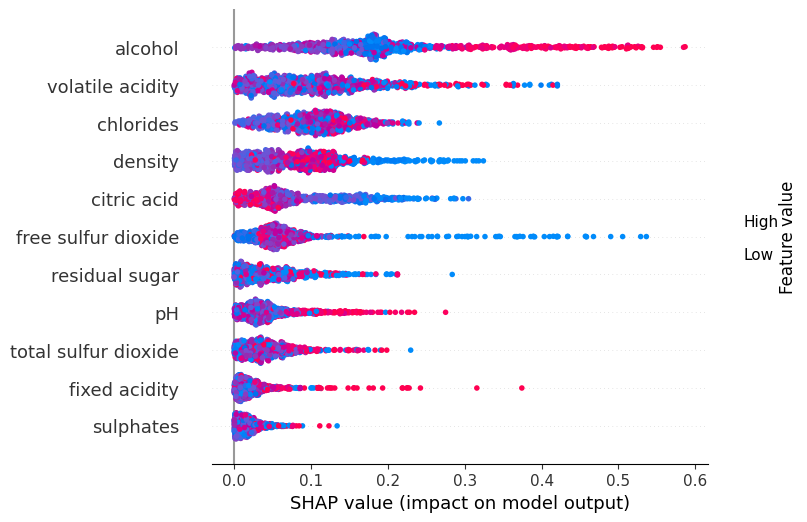

In [140]:
shap.summary_plot(np.abs(shap_values), test_sets[1], feature_names = feature_names, max_display=15)

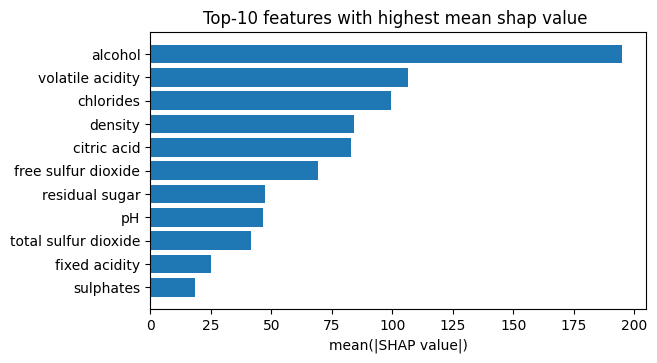

In [141]:
shap_summary = np.sum(np.abs(shap_values),axis=0) # same shape as the number of features
indcs = np.argsort(shap_summary)
shap_summary[indcs]

plt.figure(figsize=(6.4,3.6))
plt.barh(feature_names[indcs[-15:]],shap_summary[indcs[-15:]])
plt.xlabel('mean(|SHAP value|)')
plt.title('Top-10 features with highest mean shap value ')
plt.show()

In [142]:
np.argmax(test_labels[1])

869

In [143]:
test_labels[1].values[869]

9

In [148]:
np.argsort(test_labels[1]).values[-10:]

array([207, 321, 806, 206, 928, 886, 269, 667, 558, 869], dtype=int64)

In [153]:
np.argsort(test_labels[1]).values[:10]

array([463, 280, 124, 935, 452, 894, 155, 555, 376, 213], dtype=int64)

In [159]:
np.random.choice(np.argsort(test_labels[1]).values[300:500],size=6)

array([ 84, 167,  22, 243, 153,  14], dtype=int64)

8


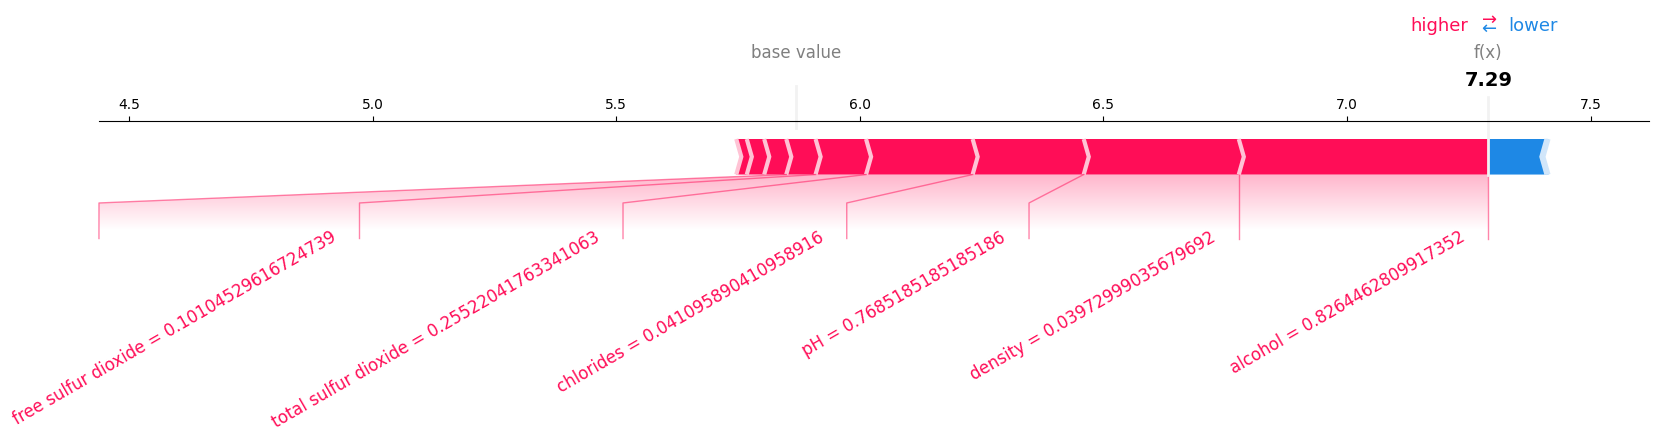

In [151]:
index = 558 # the index of the point to explain
print(test_labels[1].values[558])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True,text_rotation=30)

9


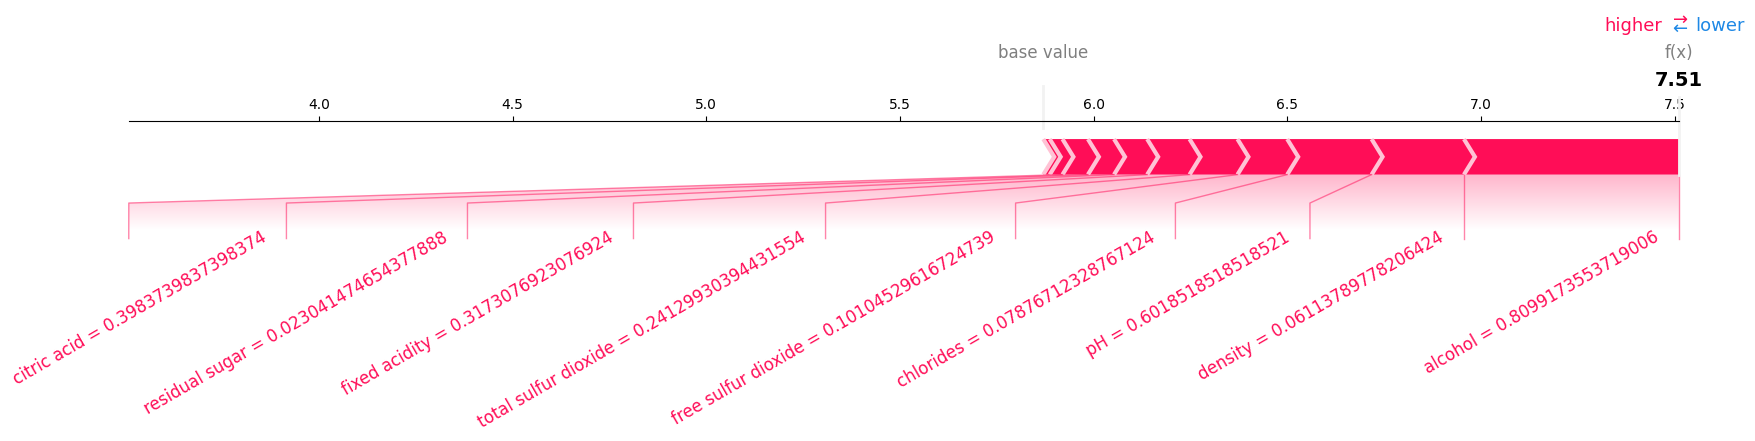

In [152]:
index = 869 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True,text_rotation=30)

3


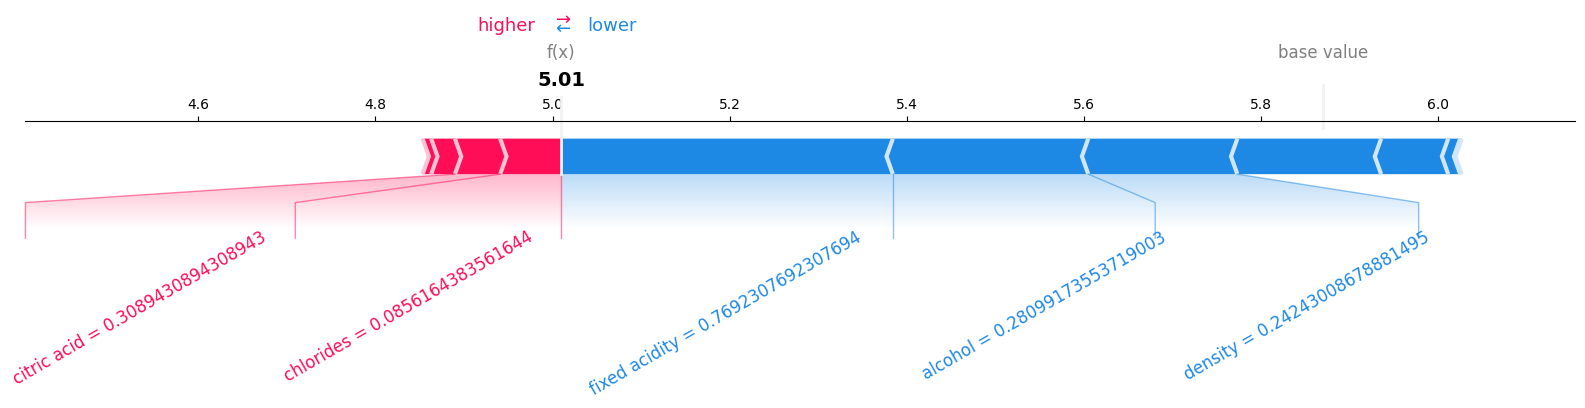

In [154]:
index = 463 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True,text_rotation=30)

3


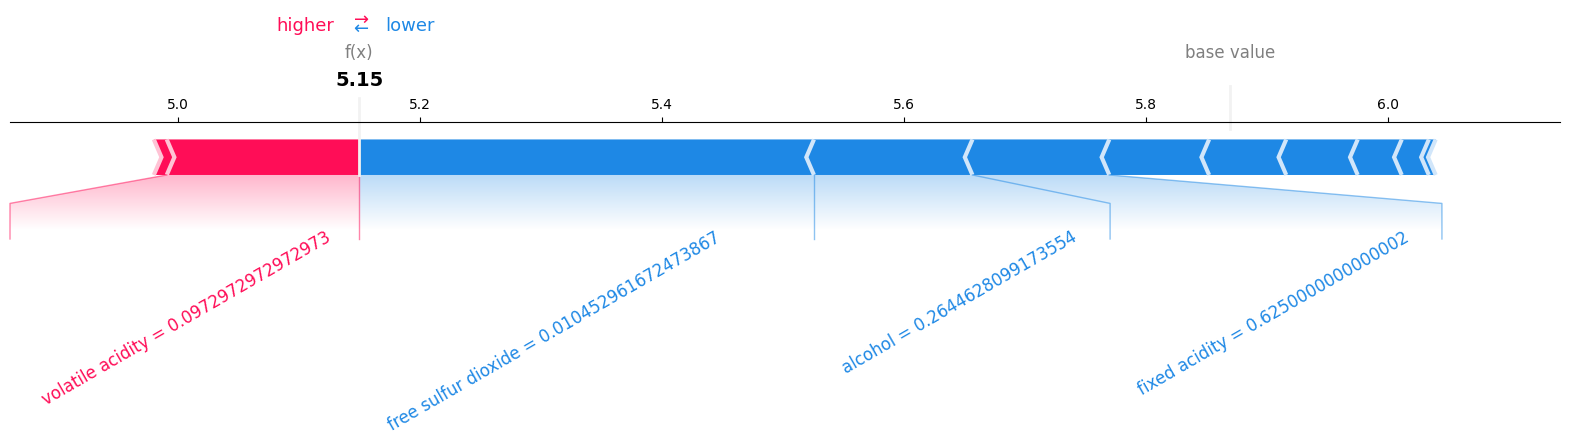

In [155]:
index = 280 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True,text_rotation=30)

5


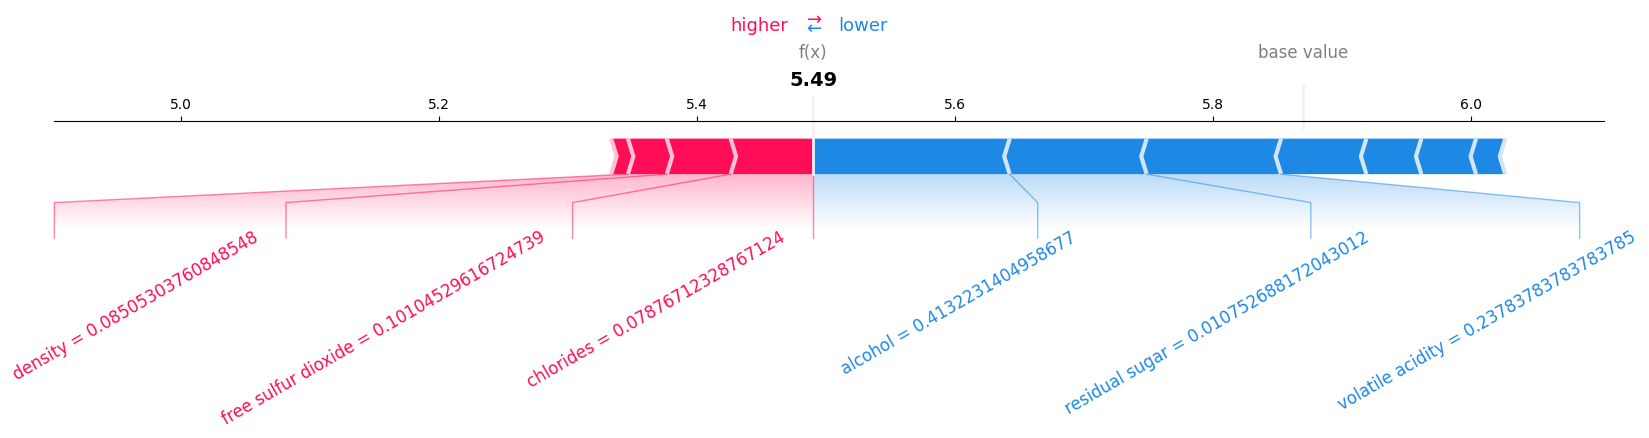

In [160]:
index = 84 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True,text_rotation=30)

5


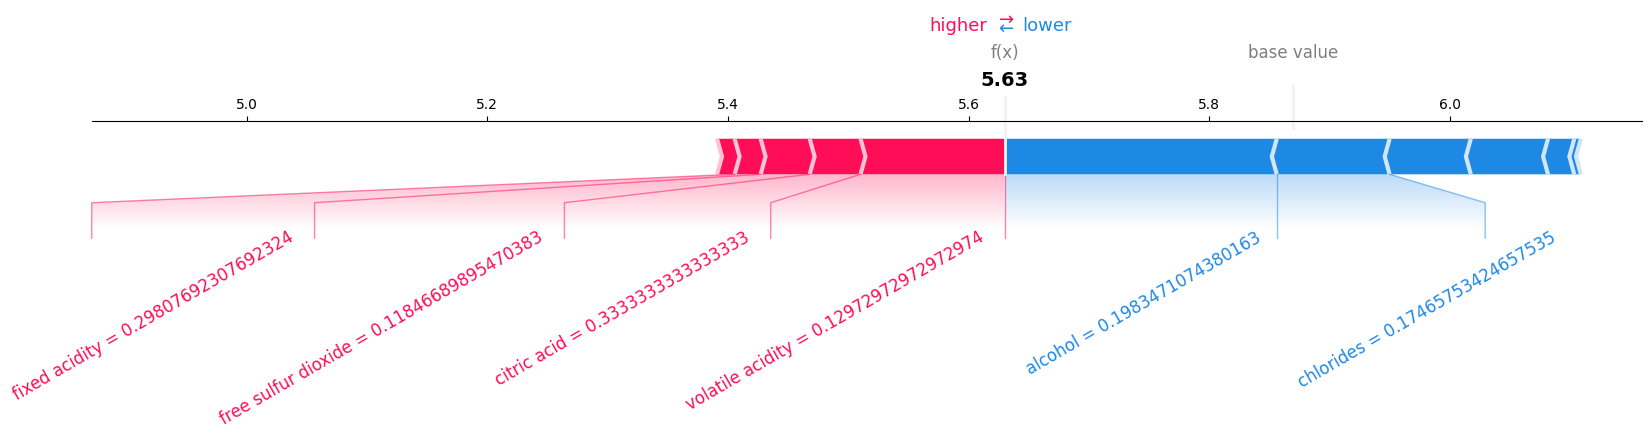

In [161]:
index = 167 # the index of the point to explain
print(test_labels[1].values[index])
shap.force_plot(explainer.expected_value, shap_values[index,:], features = test_sets[1][index,:],feature_names = feature_names,matplotlib=True,text_rotation=30)

Discuss how your scores compare to a baseline score, how many standard deviations above the baseline your model is (in classification: what is the baseline accuracy, f_beta score, etc.; in regression: what’s the baseline MSE/RMSE or R2 score). Which ML model was the most predictive? Summarize the performance of the ML models in a table or using a figure.  Calculate at least three different global feature importances and discuss your findings. Also calculate SHAP values for local feature importance. Discuss the results of model interpretations in the context of the problem. Which features are the most and least important? Did you find something that’s unexpected/surprising/interesting?

Outlook 
The outlook is the place to describe what else you could do to improve the model or the  interpretability, and what are the weak spots of your modeling approach. How would you improve this model? What additional techniques could you have used? What additional data could you collect to improve model performance? 5 points

## Reference

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



Koranga, Manisha, et al. "Analysis of white wine using machine learning algorithms." Materials Today: Proceedings 46 (2021): 11087-11093.